<a href="https://colab.research.google.com/github/GeorgeShmelin/Masterschool_time_series_Project_supermarket_favorita/blob/main/Time_Series_data_download_1_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**from MasterSchool**

I will keep here 3 top items.family till '2014-04-01'

In [ ]:
'''
We explicitly limit our data to a single store-item combination for the simplicity sake.
So, let’s load the data only for a single item-store combination:

# Let's filter the data for one store and one item to keep it simple
store_ids = [1] # the store that we select
item_ids = [96995] # the item that we select

# Select data before April'14
max_date = '2014-04-01'

# Initialize an empty list to hold filtered chunks
filtered_chunks = []

# Define the chunk size (number of rows per chunk)
chunk_size = 10 ** 6  # Adjust based on your system's memory capacity

# Read the CSV file in chunks
for chunk in pd.read_csv('/content/drive/MyDrive/retail_kaggle_data/train.csv', chunksize=chunk_size):
    # Filter the chunk for the desired store IDs
    chunk_filtered = chunk[(chunk['store_nbr'].isin(store_ids)) & (chunk['item_nbr'].isin(item_ids)) & (chunk['date']<max_date)]
    # Append the filtered chunk to the list
    filtered_chunks.append(chunk_filtered)
    # Optional: Delete the chunk to free up memory
    del chunk

# Concatenate all filtered chunks into a single DataFrame
df_filtered = pd.concat(filtered_chunks, ignore_index=True)

# Clean up to free memory
del filtered_chunks
'''

"\nWe explicitly limit our data to a single store-item combination for the simplicity sake.\nSo, let’s load the data only for a single item-store combination:\n\n# Let's filter the data for one store and one item to keep it simple\nstore_ids = [1] # the store that we select\nitem_ids = [96995] # the item that we select\n\n# Select data before April'14\nmax_date = '2014-04-01'\n\n# Initialize an empty list to hold filtered chunks\nfiltered_chunks = []\n\n# Define the chunk size (number of rows per chunk)\nchunk_size = 10 ** 6  # Adjust based on your system's memory capacity\n\n# Read the CSV file in chunks\nfor chunk in pd.read_csv('/content/drive/MyDrive/retail_kaggle_data/train.csv', chunksize=chunk_size):\n    # Filter the chunk for the desired store IDs\n    chunk_filtered = chunk[(chunk['store_nbr'].isin(store_ids)) & (chunk['item_nbr'].isin(item_ids)) & (chunk['date']<max_date)]\n    # Append the filtered chunk to the list\n    filtered_chunks.append(chunk_filtered)\n    # Optiona

# Libraries

In [ ]:
# !pip install kagglehub
import kagglehub

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import sqlite3
import os
import gc

In [ ]:
import sqlalchemy as sa
from google.colab import files
from sqlalchemy import text
from sqlalchemy import create_engine

In [ ]:
from sklearn.neighbors import NearestNeighbors  # Import NearestNeighbors for cleaning
from sklearn.neighbors import LocalOutlierFactor

# Data download and initial transformations

In [ ]:
# Download latest version
path = kagglehub.dataset_download("siliconx/favoritagrocerysalesforecastingextracted")

print("Path to dataset files:", path)

100%|██████████| 850M/850M [00:10<00:00, 83.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/siliconx/favoritagrocerysalesforecastingextracted/versions/1


In [ ]:
files = os.listdir(path)
print("Files in dataset:", files)

Files in dataset: ['sample_submission.csv', 'stores.csv', 'holidays_events.csv', 'train.csv', 'test.csv', 'oil.csv', 'transactions.csv', 'items.csv']


In [ ]:
# Connect to SQLite
conn = sqlite3.connect("favorita.db")

# Change this line per file
filename = 'oil.csv'
file_path = os.path.join(path, filename)

# Load CSV
df = pd.read_csv(file_path)
table_name = filename.replace('.csv', '')

# Load to SQL
df.to_sql(table_name, conn, if_exists="replace", index=False)
print(f"✅ Loaded '{filename}' into table '{table_name}'")

# Row count
query = f"SELECT COUNT(*) AS row_count FROM {table_name};"
row_count_df = pd.read_sql(query, conn)
row_count = row_count_df.iloc[0, 0]
print(f"🔢 Table '{table_name}' has {row_count:,} rows.")

# Inspect columns for key info
columns = df.columns.tolist()
primary_like = [col for col in columns if 'id' in col.lower() or 'nbr' in col.lower()]
date_like = [col for col in columns if 'date' in col.lower()]
possible_keys = primary_like + date_like

# Show candidate keys
if possible_keys:
    print(f"🔑 Candidate keys or join fields in '{table_name}': {possible_keys}")
else:
    print(f"ℹ️ No obvious join keys found in '{table_name}'")

✅ Loaded 'oil.csv' into table 'oil'
🔢 Table 'oil' has 1,218 rows.
🔑 Candidate keys or join fields in 'oil': ['date']


In [ ]:
# Change this line per file
filename = 'items.csv'
file_path = os.path.join(path, filename)

# Load CSV
df = pd.read_csv(file_path)
table_name = filename.replace('.csv', '')

# Load to SQL
df.to_sql(table_name, conn, if_exists="replace", index=False)
print(f"✅ Loaded '{filename}' into table '{table_name}'")

# Row count
query = f"SELECT COUNT(*) AS row_count FROM {table_name};"
row_count_df = pd.read_sql(query, conn)
row_count = row_count_df.iloc[0, 0]
print(f"🔢 Table '{table_name}' has {row_count:,} rows.")

# Inspect columns for key info
columns = df.columns.tolist()
primary_like = [col for col in columns if 'id' in col.lower() or 'nbr' in col.lower()]
date_like = [col for col in columns if 'date' in col.lower()]
possible_keys = primary_like + date_like

# Show candidate keys
if possible_keys:
    print(f"🔑 Candidate keys or join fields in '{table_name}': {possible_keys}")
else:
    print(f"ℹ️ No obvious join keys found in '{table_name}'")

✅ Loaded 'items.csv' into table 'items'
🔢 Table 'items' has 4,100 rows.
🔑 Candidate keys or join fields in 'items': ['item_nbr']


In [ ]:
# Change this line per file
filename = 'holidays_events.csv'
file_path = os.path.join(path, filename)

# Load CSV
df = pd.read_csv(file_path)
table_name = filename.replace('.csv', '')

# Load to SQL
df.to_sql(table_name, conn, if_exists="replace", index=False)
print(f"✅ Loaded '{filename}' into table '{table_name}'")

# Row count
query = f"SELECT COUNT(*) AS row_count FROM {table_name};"
row_count_df = pd.read_sql(query, conn)
row_count = row_count_df.iloc[0, 0]
print(f"🔢 Table '{table_name}' has {row_count:,} rows.")

# Inspect columns for key info
columns = df.columns.tolist()
primary_like = [col for col in columns if 'id' in col.lower() or 'nbr' in col.lower()]
date_like = [col for col in columns if 'date' in col.lower()]
possible_keys = primary_like + date_like

# Show candidate keys
if possible_keys:
    print(f"🔑 Candidate keys or join fields in '{table_name}': {possible_keys}")
else:
    print(f"ℹ️ No obvious join keys found in '{table_name}'")

✅ Loaded 'holidays_events.csv' into table 'holidays_events'
🔢 Table 'holidays_events' has 350 rows.
🔑 Candidate keys or join fields in 'holidays_events': ['date']


In [ ]:
# Set up file
filename = 'stores.csv'
file_path = os.path.join(path, filename)

# Load and filter for Guayas
df = pd.read_csv(file_path)
df = df[df['state'] == 'Guayas']  # 👈 Filter

table_name = filename.replace('.csv', '')

# Save to SQL
df.to_sql(table_name, conn, if_exists="replace", index=False)
print(f"✅ Loaded '{filename}' into table '{table_name}' (only state = 'Guayas')")

# Row count
query = f"SELECT COUNT(*) AS row_count FROM {table_name};"
row_count_df = pd.read_sql(query, conn)
row_count = row_count_df.iloc[0, 0]
print(f"🔢 Table '{table_name}' has {row_count:,} rows.")

# Inspect columns for join keys
columns = df.columns.tolist()
primary_like = [col for col in columns if 'id' in col.lower() or 'nbr' in col.lower()]
date_like = [col for col in columns if 'date' in col.lower()]
possible_keys = primary_like + date_like

# Show candidate keys
if possible_keys:
    print(f"🔑 Candidate keys or join fields in '{table_name}': {possible_keys}")
else:
    print(f"ℹ️ No obvious join keys found in '{table_name}'")

✅ Loaded 'stores.csv' into table 'stores' (only state = 'Guayas')
🔢 Table 'stores' has 11 rows.
🔑 Candidate keys or join fields in 'stores': ['store_nbr']


In [ ]:
# Change this line per file
filename = 'transactions.csv'
file_path = os.path.join(path, filename)

# Load CSV
df = pd.read_csv(file_path)
table_name = filename.replace('.csv', '')

# Load to SQL
df.to_sql(table_name, conn, if_exists="replace", index=False)
print(f"✅ Loaded '{filename}' into table '{table_name}'")

# Row count
query = f"SELECT COUNT(*) AS row_count FROM {table_name};"
row_count_df = pd.read_sql(query, conn)
row_count = row_count_df.iloc[0, 0]
print(f"🔢 Table '{table_name}' has {row_count:,} rows.")

# Inspect columns for key info
columns = df.columns.tolist()
primary_like = [col for col in columns if 'id' in col.lower() or 'nbr' in col.lower()]
date_like = [col for col in columns if 'date' in col.lower()]
possible_keys = primary_like + date_like

# Show candidate keys
if possible_keys:
    print(f"🔑 Candidate keys or join fields in '{table_name}': {possible_keys}")
else:
    print(f"ℹ️ No obvious join keys found in '{table_name}'")

✅ Loaded 'transactions.csv' into table 'transactions'
🔢 Table 'transactions' has 83,488 rows.
🔑 Candidate keys or join fields in 'transactions': ['store_nbr', 'date']


In [ ]:
del files
del possible_keys
del columns
del date_like
del primary_like
del df
del row_count_df
del query

In [ ]:
# Paths and file setup
filename = 'train.csv'
file_path = os.path.join(path, filename)
table_name = filename.replace('.csv', '')

# Date filter range
DATE_START = '2010-09-15'
DATE_END = '2015-04-01'

# Sampling + row cap
SAMPLE_RATIO = 0.01
MAX_ROWS = 2500_000
total_saved_rows = 0

# Columns to keep from CSV
columns_to_keep = ['date', 'store_nbr', 'item_nbr', 'unit_sales', 'onpromotion']

In [ ]:
# Connect to SQLite
conn = sqlite3.connect("favorita.db")
cursor = conn.cursor()

# Check if the table exists
cursor.execute(f"SELECT name FROM sqlite_master WHERE type='table' AND name='{table_name}'")
table_exists = cursor.fetchone()

# If not exists, create it with correct schema
if not table_exists:
    create_sql = f"""
        CREATE TABLE {table_name} (
            date DATETIME,
            store_nbr INTEGER,
            item_nbr INTEGER,
            unit_sales REAL,
            onpromotion INTEGER
        )
    """
    conn.execute(create_sql)
    print(f"✅ Created table '{table_name}' with all expected columns")
else:
    # Validate column schema
    cursor.execute(f"PRAGMA table_info({table_name})")
    existing_columns = [col[1] for col in cursor.fetchall()]
    if 'onpromotion' not in existing_columns:
        try:
            conn.execute(f"ALTER TABLE {table_name} ADD COLUMN onpromotion INTEGER")
            print(f"➕ Added missing column 'onpromotion' to '{table_name}'")
        except sqlite3.OperationalError as e:
            print(f"⚠️ Could not alter table to add 'onpromotion': {e}")
    else:
        print(f"ℹ️ Table '{table_name}' exists and includes 'onpromotion'")

✅ Created table 'train' with all expected columns


In [ ]:
# Read CSV in chunks
chunks = pd.read_csv(file_path, chunksize=250_000, parse_dates=['date'])

for chunk in chunks:
    # Filter date
    chunk = chunk[(chunk['date'] >= DATE_START) & (chunk['date'] < DATE_END)]
    if chunk.empty:
        continue

    # Round to hour
    chunk['date'] = pd.to_datetime(chunk['date'], errors='coerce').dt.floor('H')

    # Ensure onpromotion column
    if 'onpromotion' not in chunk.columns:
        chunk['onpromotion'] = 0
    chunk['onpromotion'] = chunk['onpromotion'].fillna(False).astype('int8')  # Make it small

    # Downcast numerics
    chunk['store_nbr'] = pd.to_numeric(chunk['store_nbr'], downcast='integer')
    chunk['item_nbr'] = pd.to_numeric(chunk['item_nbr'], downcast='integer')
    chunk['unit_sales'] = pd.to_numeric(chunk['unit_sales'], downcast='float')

    # Try float16 if it fits (warning: less precise)
    if chunk['unit_sales'].max() < 65504:  # float16 upper limit
        chunk['unit_sales'] = chunk['unit_sales'].astype('float16')

    # Sample
    chunk = chunk.sample(frac=SAMPLE_RATIO, random_state=42)

    # Cap rows
    if total_saved_rows + len(chunk) > MAX_ROWS:
        chunk = chunk.iloc[:MAX_ROWS - total_saved_rows]

    # Keep only expected columns
    chunk = chunk[columns_to_keep]

    # Save
    chunk.to_sql(table_name, conn, if_exists='append', index=False)
    total_saved_rows += len(chunk)

    if total_saved_rows >= MAX_ROWS:
        break

print(f"✅ Loaded {total_saved_rows} rows into '{table_name}'")

<ipython-input-17-db1b2a1ade8f>:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  chunk['date'] = pd.to_datetime(chunk['date'], errors='coerce').dt.floor('H')
<ipython-input-17-db1b2a1ade8f>:16: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  chunk['onpromotion'] = chunk['onpromotion'].fillna(False).astype('int8')  # Make it small
<ipython-input-17-db1b2a1ade8f>:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  chunk['date'] = pd.to_datetime(chunk['date'], errors='coerce').dt.floor('H')
<ipython-input-17-db1b2a1ade8f>:16: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_obj

In [ ]:
chunk['onpromotion'] = chunk['onpromotion'].fillna(False).astype('int8')
chunk['unit_sales'] = pd.to_numeric(chunk['unit_sales'], downcast='float')
if chunk['unit_sales'].max() < 65504:
    chunk['unit_sales'] = chunk['unit_sales'].astype('float16')

In [ ]:
# Row count
row_count = pd.read_sql(f"SELECT COUNT(*) AS row_count FROM {table_name}", conn).iloc[0, 0]
print(f"🔢 Table '{table_name}' has {row_count:,} rows.")

# Keys for join
sample = pd.read_sql(f"SELECT * FROM {table_name} LIMIT 5", conn)
columns = sample.columns.tolist()
keys = [col for col in columns if 'id' in col.lower() or 'nbr' in col.lower() or 'date' in col.lower()]
print(f"🔑 Candidate keys or join fields in '{table_name}': {keys}")

🔢 Table 'train' has 439,522 rows.
🔑 Candidate keys or join fields in 'train': ['date', 'store_nbr', 'item_nbr']


In [ ]:
# del cursor
del row_count
del sample
del keys
del columns

## From SQL to DataFrame

In [ ]:
database_connection_string = "sqlite:///favorita.db"  # Assuming the database file is named 'favorita.db'

# Create the engine
engine = sa.create_engine(database_connection_string)

In [ ]:
query_download = """
WITH top_families AS (
    SELECT items.family
    FROM train
    JOIN items ON train.item_nbr = items.item_nbr
    WHERE train.unit_sales >= 0
    GROUP BY items.family
    ORDER BY SUM(train.unit_sales) DESC
    LIMIT 3
)

SELECT
    train.unit_sales,
    train.date AS train_date,
    train.store_nbr,
    train.item_nbr,
    train.onpromotion,

    oil.dcoilwtico,

    holidays_events.type AS holiday_type,
    holidays_events.locale,
    holidays_events.transferred,

    stores.city,
    stores.type AS store_type,
    stores.cluster AS store_cluster,

    items.family AS items_family,
    items.class AS item_class,
    items.perishable AS perishable_items,

    transactions.transactions

FROM train
LEFT JOIN oil
  ON DATE(train.date) = DATE(oil.date)
LEFT JOIN holidays_events
  ON DATE(train.date) = DATE(holidays_events.date)
INNER JOIN stores
  ON train.store_nbr = stores.store_nbr
INNER JOIN items
  ON train.item_nbr = items.item_nbr
INNER JOIN transactions
  ON DATE(train.date) = DATE(transactions.date)
     AND train.store_nbr = transactions.store_nbr

WHERE train.unit_sales >= 0
  AND items.family IN (SELECT family FROM top_families)
  AND train.date > '2014-04-01'

LIMIT 2500000;
"""

In [ ]:
df_download = pd.read_sql_query(query_download, engine)

In [ ]:
df = df_download.copy()
df.shape

(26307, 16)

In [ ]:
gc.collect() # gc.collect() are for garbage collection — basically cleaning up memory that Python no longer needs

9

# Data cleaning and transforming

In [ ]:
df['items_family'].nunique()

3

In [ ]:
# Check if 'index' column exists before deleting
if 'index' in df.columns:
    del df['index']

In [ ]:
# Check if 'index' column exists before deleting
if 'index' in df.columns:
    df = df.drop(columns=['index'])
    print("'index' column dropped successfully.")
else:
    print("'index' column not found in the DataFrame.")

'index' column not found in the DataFrame.


In [ ]:
df['dcoilwtico'] = df['dcoilwtico'].fillna(method='ffill')
df['dcoilwtico'] = df['dcoilwtico'].round(2)

<ipython-input-62-0a4d8ef736a4>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['dcoilwtico'] = df['dcoilwtico'].fillna(method='ffill')


In [ ]:
df['onpromotion'] = df['onpromotion'].fillna(0).astype(bool)
df['onpromotion'] = df['onpromotion'].astype(int)

In [ ]:
df['transferred'] = df['transferred'].fillna(0).astype(bool)
df['transferred'] = df['transferred'].astype(int)

In [ ]:
df['perishable_items'] = df['perishable_items'].fillna(0).astype(bool)
df['perishable_items'] = df['perishable_items'].astype(int)

In [ ]:
df['weighted_unit_sales'] = df['unit_sales']  # Create a copy of 'unit_sales'

# Apply the weight where 'perishable_items' is True/1
df.loc[df['perishable_items'] == 1, 'weighted_unit_sales'] *= 1.5
# or df.loc[df['perishable_items'], 'weighted_unit_sales'] *= 1.5 if 'perishable_items' is boolean

In [ ]:
del df['perishable_items']

In [ ]:
df['items_family'].astype('category').inplace = True
df['store_nbr'].astype('category').inplace = True

In [ ]:
# Ensure 'date' is a datetime object
df['date'] = pd.to_datetime(df['train_date']) # Renamed 'train_date' column to 'date'

# Extract and add new columns
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['week'] = df['date'].dt.isocalendar().week # Extract week number from 'date' column
df['day_of_week'] = df['date'].dt.dayofweek # Extract day of the week from 'date'

del df['train_date']

In [ ]:
df['year_scaled'] = df['year'] - 2017  # center on a meaningful reference, Simple Offset Scaling
del df['year']

In [ ]:
del df['holiday_type']
del df['locale']

In [ ]:
# Get sorted unique cluster values
unique_clusters = sorted(df['store_cluster'].unique())

# Create a mapping from original cluster IDs to new ones (0 to N-1)
cluster_map = {old: new for new, old in enumerate(unique_clusters)}

# Apply the mapping
df['store_cluster'] = df['store_cluster'].map(cluster_map)

In [ ]:
del df['store_type']
del df['store_cluster']

In [ ]:
df['weighted_unit_sales'] = df['weighted_unit_sales'].round(2)
df['unit_sales'] = df['unit_sales'].round(2)

In [ ]:
city_dummies = pd.get_dummies(df['city'], prefix='city', dummy_na=True)

for col in city_dummies.columns:
    df[col] = city_dummies[col].astype(int)

del df['city']

In [ ]:
items_family_dummies = pd.get_dummies(df['items_family'], prefix='items_family', dummy_na=True)
for col in items_family_dummies.columns:
    df[col] = items_family_dummies[col].astype(int)

del df['items_family']

In [ ]:
# df['item_class'].nunique()
df['item_class'].astype('category').inplace = True

In [ ]:
df.sample(2)

,unit_sales,store_nbr,item_nbr,onpromotion,dcoilwtico,transferred,item_class,transactions,weighted_unit_sales,date,...,year_scaled,city_Daule,city_Guayaquil,city_Libertad,city_Playas,city_nan,items_family_BEVERAGES,items_family_CLEANING,items_family_GROCERY I,items_family_nan
20829,2.0,30,881910,0,46.79,0,1042,657,2.0,2015-01-17,...,-2,0,1,0,0,0,0,0,1,0
989,1.0,26,358100,0,103.71,0,1010,806,1.0,2014-04-16,...,-3,0,1,0,0,0,0,0,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26307 entries, 0 to 26306
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   unit_sales              26307 non-null  float64       
 1   store_nbr               26307 non-null  int64         
 2   item_nbr                26307 non-null  int64         
 3   onpromotion             26307 non-null  int64         
 4   dcoilwtico              26307 non-null  float64       
 5   transferred             26307 non-null  int64         
 6   item_class              26307 non-null  int64         
 7   transactions            26307 non-null  int64         
 8   weighted_unit_sales     26307 non-null  float64       
 9   date                    26307 non-null  datetime64[ns]
 10  month                   26307 non-null  int32         
 11  day                     26307 non-null  int32         
 12  week                    26307 non-null  UInt32

In [ ]:
# Downcast numeric columns to smallest possible types
for col in df.select_dtypes(include=['int', 'float']).columns:
    if pd.api.types.is_integer_dtype(df[col]):
        df[col] = pd.to_numeric(df[col], downcast='integer')
    elif pd.api.types.is_float_dtype(df[col]):
        df[col] = pd.to_numeric(df[col], downcast='float')

## Initial Data review

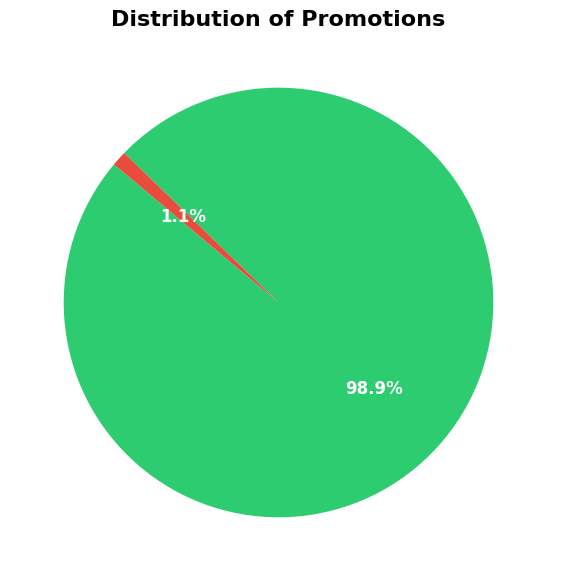

In [ ]:
onpromotion_counts = df['onpromotion'].value_counts(dropna=False)

# Custom labels
labels = ['Promoted' if val == True else 'Not Promoted' if val == False else 'Missing' for val in onpromotion_counts.index]

# Custom colors
colors = ['#2ecc71', '#e74c3c', '#95a5a6']  # green, red, gray

# Create the pie chart
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    onpromotion_counts,
    labels=labels,
    colors=colors[:len(onpromotion_counts)],
    autopct='%1.1f%%',
    startangle=140,
    textprops=dict(color="white")
)

# Styling
plt.setp(autotexts, size=12, weight="bold")
plt.setp(texts, size=12)
plt.title('Distribution of Promotions', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

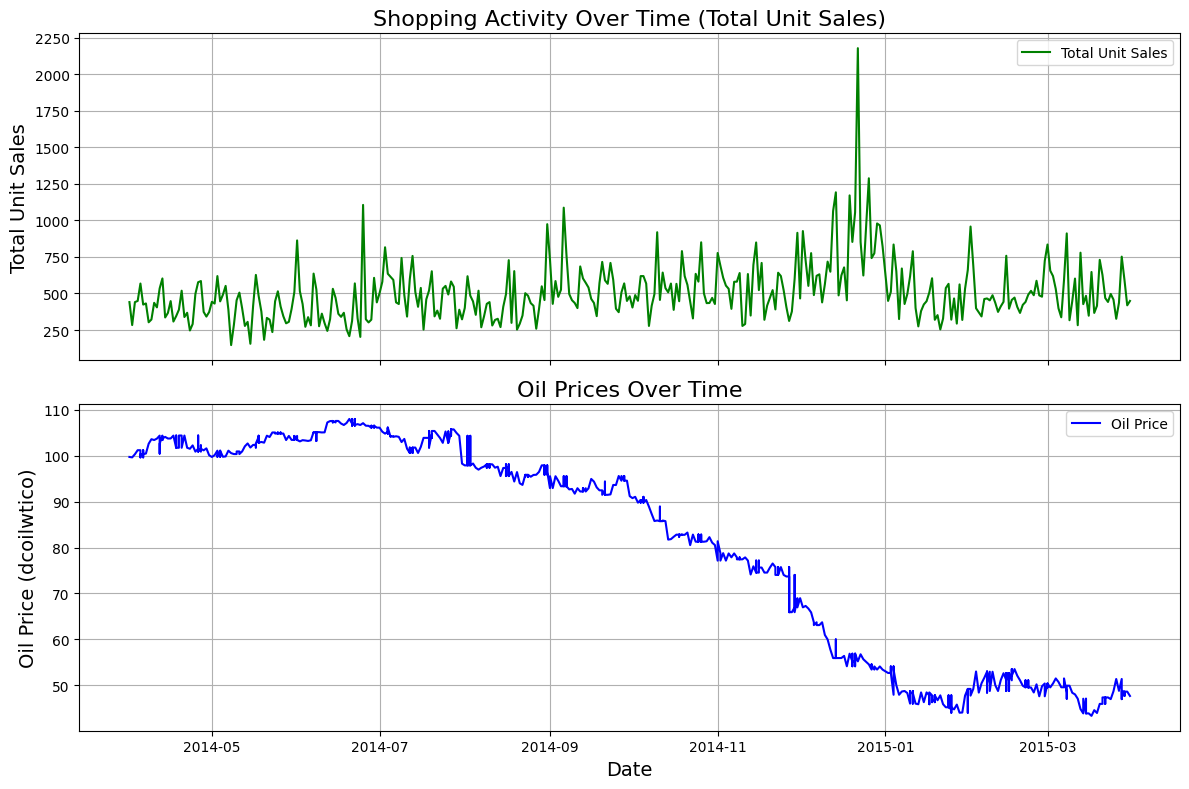

In [ ]:
# Ensure 'date' is datetime
df['date'] = pd.to_datetime(df['date'])

# Sort by date
df = df.sort_values('date')

# Group total unit_sales per day
sales_per_day = df.groupby('date')['weighted_unit_sales'].sum()

# Create two vertically stacked plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Top plot: Total unit sales over time
ax1.plot(sales_per_day.index, sales_per_day.values, color='green', label='Total Unit Sales')
ax1.set_title('Shopping Activity Over Time (Total Unit Sales)', fontsize=16)
ax1.set_ylabel('Total Unit Sales', fontsize=14)
ax1.legend()
ax1.grid(True)

# Bottom plot: Oil prices over time
ax2.plot(df['date'], df['dcoilwtico'], color='blue', label='Oil Price')
ax2.set_title('Oil Prices Over Time', fontsize=16)
ax2.set_xlabel('Date', fontsize=14)
ax2.set_ylabel('Oil Price (dcoilwtico)', fontsize=14)
ax2.legend()
ax2.grid(True)

# Layout adjustment
plt.tight_layout()
plt.show()

## save my csv file in my Google Drive directory

In [ ]:
df.shape

(26307, 24)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/MasterSchool/MasterSchool_Python/Time_Series/Time_series_project/df_train_3.csv'
df.to_csv(file_path, index=False)